# Page Rank and HITS
### Till 02.03.2017

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline

During with lab we will check the change of results of Page Rank and HITS algorithms with respect to the values of $\alpha$ and number of iterations.

### Task 1.

a) Firstly let's make experiment for small network (Zachary or any other small one). Set any 3 distinct values for $\alpha$, fix the number of iterations, and run Page Rank. Plot results PR values wrt $\alpha$

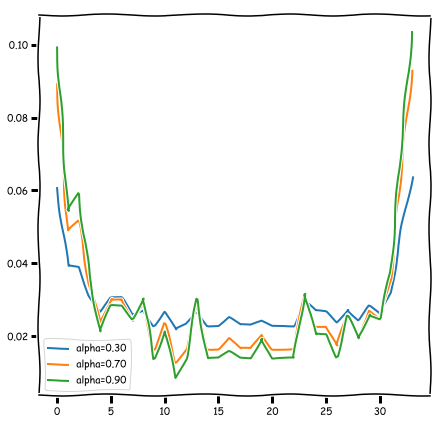

In [184]:
G = nx.karate_club_graph()
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for alpha in [0.3, 0.7, 0.9]:
    results = nx.pagerank(G, alpha, max_iter=100)
    ax.plot(results.keys(), results.values(), label='alpha=%.2f' % alpha)
    
ax.legend()

We may observe that (most) of nodes with high pagerank value tend to get even higher value when increasing $\alpha$, and ones with low pagerank get even lower value, so lower $\alpha$ leads to the smoother distribution (note that at $\alpha$=0 it is uniform).

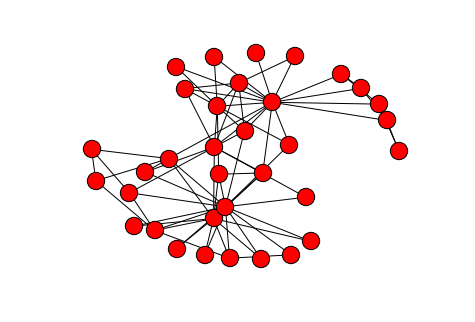

In [24]:
nx.draw(G)

b) Do the same for the number of iterations

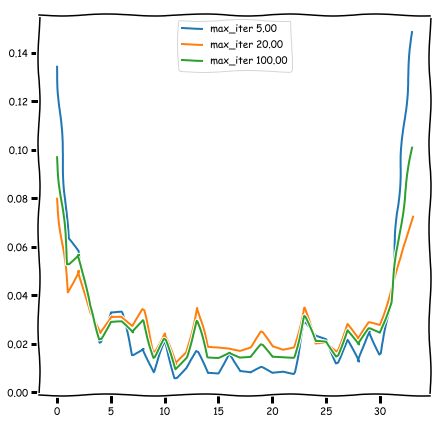

In [188]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for max_iter in [5, 20, 100]:
    results = nx.pagerank(G, alpha=0.85, max_iter=max_iter, tol=np.exp(-0.2 * max_iter))
    ax.plot(results.keys(), results.values(), label='max_iter %.2f' % max_iter)

ax.legend()

We can observe that distribution "jumps around" its true value (5 iterations -- too sharp; 20 iterations --- to smooth, but closer) before converging.

c) Plot Page-Rank vs. Degree centrality

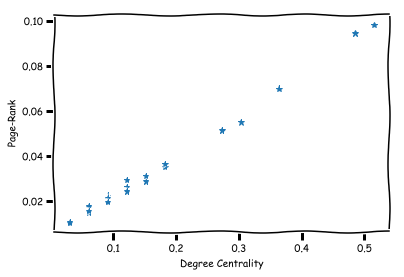

In [131]:
# Continue here
pr = nx.pagerank(G, alpha=0.8)
pr = pr.values()
d = nx.degree_centrality(G)
d = d.values()

plt.plot(d, pr, '*')
plt.xlabel('Degree Centrality')
plt.ylabel('Page-Rank')

### Task 2.

Let's switch to a bigger network. Download [political blogs](http://networkdata.ics.uci.edu/data/polblogs/polblogs.gml) network. Check its basic properties. Run HITS algorithm. Try to inverstigate the top nodes.

In [132]:
G = nx.read_gml('polblogs.gml')

In [133]:
G.is_directed()
A = nx.adjacency_matrix(G)

P = nx.DiGraph(A)

In [134]:
(h, a) = nx.hits(P)
a = a.values()
h = h.values()

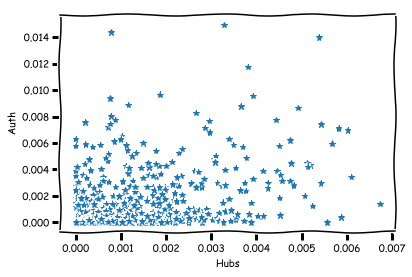

In [135]:
plt.plot(h,a, '*')
plt.xlabel('Hubs')
plt.ylabel('Auth')

In [53]:
idx = np.argsort(a)
idx[-1]

154

In [32]:
G.node[idx[-1]]

{'id': 154,
 'label': u'dailyhowler.com',
 'source': u'LeftyDirectory',
 'value': 0}

Vizualize top Authorities colored in blue with sizes proportional to A-value and their Common Hubs coloured in green with size proportional to H-value.

We draw top 5% of Authorities and their common hubs (hub is considered common if it cites three or more authorities). We also draw (with red color and size proportional to H-value) overall top 2% Hubs. If node belongs both to top authority and common hub classes, we use cyan instead of blue; if node belongs both to top authority and top hubs classes, we use magenta (the H-value in these cases is preferable for determining size). 

In [171]:
a_nodes = {id for id in idx[-int(0.05 * len(idx)):]}
h_nodes = {n for n in G.nodes() if len([a_n for a_n in a_nodes if G.has_edge(n, a_n)]) >= 3 }#0.1 * len(a_nodes)}
top_h_nodes = {id for id in idy[-int(0.02 * len(idy)):]}


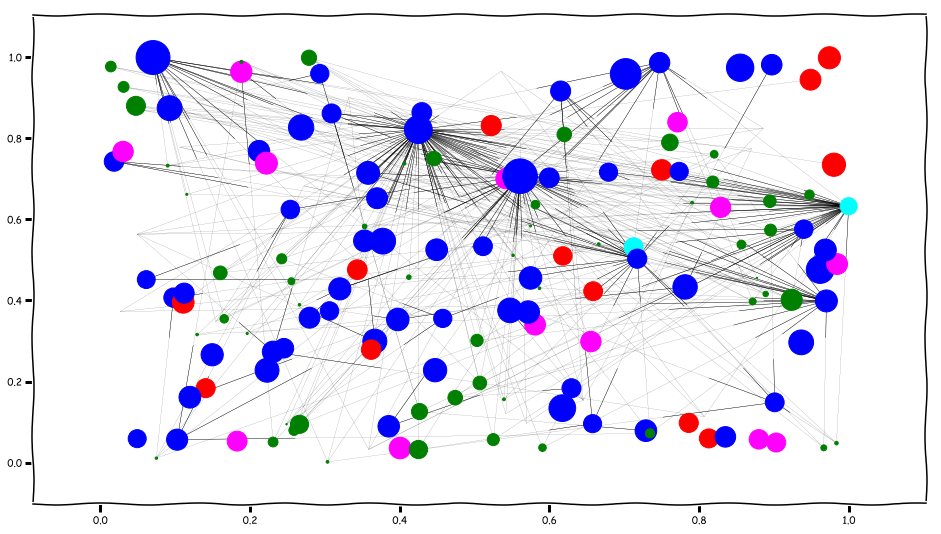

In [182]:
plt.figure(1, figsize=(16, 9))
nodes = list(a_nodes | h_nodes | top_h_nodes)
H = G.subgraph(nodes)
nodes = H.nodes()

node_colors = []
for node in nodes:
    if node in h_nodes and node in a_nodes:
        node_colors.append('cyan')
    elif node in top_h_nodes and node in a_nodes:
        node_colors.append('magenta')
    elif node in h_nodes:
        node_colors.append('green')
    elif node in a_nodes:
        node_colors.append('blue')
    elif node in top_h_nodes:
        node_colors.append('red')
        
nx.draw_networkx(H, 
                 nx.random_layout(H),
                 node_color=node_colors, #[('green' if node in h_nodes else 'red') if (node in h_nodes or node in top_h_nodes) else 'blue' for node in nodes], 
                 node_size=[80000 * (h[node] if node in h_nodes or node in top_h_nodes else a[node]) for node in nodes], 
                 labels={node: '' for node in nodes}, 
                 nodelist=nodes,
                 edgelist=[edge for edge in H.edges() if (edge[0] in h_nodes or edge[0] in top_h_nodes) and edge[1] in a_nodes],
                 width=0.10)

Please note that overall top hubs often cite less then three top authorities, and top authorities are often not cited by top hubs.